# Import 

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import h5py
import tables
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# Functions 

In [32]:
def get_snps(rsid, study_path=None, study_name=None , split_size=25000 ):
    
    
    main_dict={}
    main_dict['id']=[]   
    
    probes_path='/{}/probes/{}.h5'
    genotype_path='/{}/genotype/{}_{}.h5'
    ind_path='/{}/individuals/{}.h5'

    store=pd.HDFStore( probes_path.format(study_path,study_name),'r' )
    df_tmp=store.select('probes',where='ID==rsid')
    store.close()
    index=df_tmp.index.tolist()
    IDs=df_tmp.ID.tolist()

    ind=pd.read_hdf(ind_path.format(study_path,study_name),'individuals').individual.tolist()

    main_dict['id']=  ind

    chunks = np.array(index) / split_size
    ind=np.array(index) - split_size * chunks
    
    for j,i in enumerate(IDs):

        gen_tmp=h5py.File(genotype_path.format(study_path,chunks[j],study_name) ,'r')['genotype'][ind[j],:]
        if main_dict.get(i,0)==0:
            main_dict[i]=list(gen_tmp)
        else:                    
            main_dict[i]=main_dict[i] + list(gen_tmp)

    return pd.DataFrame.from_dict(main_dict)
                
    

In [33]:
def get_alleles(allele, df_hash):
    
    str_allele=pd.merge(pd.DataFrame({'keys':allele} ), df_hash, on='keys' ).allele.tolist()
    
    return str_allele

# Global variables 

In [3]:
SummerSchool_PATH='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018/'

In [4]:
study_1='study_1'
study_2='study_2'

# Individuals 

## Study 1

In [5]:
study_name='study_1'
df_ind=pd.read_hdf('{}/{}/{}/individuals/{}.h5'.format(SummerSchool_PATH,study_1,study_1,study_1),'individuals')
print df_ind.shape
df_ind.head()

(1477, 1)


,individual
0,study_1_0
1,study_1_1
2,study_1_2
3,study_1_3
4,study_1_4


## Study 2

In [6]:
df_ind=pd.read_hdf('{}/{}/{}/individuals/{}.h5'.format(SummerSchool_PATH,study_2,study_2,study_2),'individuals')
print df_ind.shape
df_ind.head()

(1477, 1)


,individual
0,study_2_0
1,study_2_1
2,study_2_2
3,study_2_3
4,study_2_4


# Probes 

## Study 1

In [7]:
store=pd.HDFStore( '{}/{}/{}/probes/{}.h5'.format(SummerSchool_PATH,study_1,study_1,study_1),'r' )
store.select('probes',start=0,stop=10)

,ID,allele1,allele2,MAF,Rsq,CHR,bp
0,7:33185035,8320025024,9088027334,0.18213,1.00034,7,33185035
1,7:33185068,9088027334,8576025794,0.00461,0.22443,7,33185068
2,7:33185609,10752032341,8576025794,0.18213,1.00034,7,33185609
3,7:33186065,10752032341,9088027334,0.16056,0.89488,7,33186065
4,7:33186066,10752032341,8320025024,0.15856,0.88030,7,33186066
5,7:33186082,9088027334,8576025794,0.16195,0.99158,7,33186082
6,7:33186210,8576025794,10752032341,0.22479,0.99996,7,33186210
7,7:33186317,8320025024,9088027334,0.14574,0.97877,7,33186317
8,7:33186329,8320025024,9088027334,0.20862,0.94544,7,33186329
9,7:33186353,9088027334,8576025794,0.18213,1.00034,7,33186353


In [8]:
df_hash_1=pd.read_csv('{}/{}/{}/probes/{}_hash_table.csv.gz'.format(SummerSchool_PATH,study_1,study_1,study_1),sep='\t')
df_hash_1.head()

,allele,keys
0,A,8320025024
1,C,8576025794
2,D,8704026181
3,G,9088027334
4,I,9344028104


In [29]:
hash("A")

8320025024

In [41]:
store.close()

## Study 2

In [9]:
store=pd.HDFStore( '{}/{}/{}/probes/{}.h5'.format(SummerSchool_PATH,study_2,study_2,study_2),'r' )
store.select('probes',start=0,stop=10)

,ID,allele1,allele2,MAF,Rsq,CHR,bp
0,7:33185035,8320025024,9088027334,0.18213,1.00034,7,33185035
1,7:33185068,9088027334,8576025794,0.00461,0.22443,7,33185068
2,7:33185609,10752032341,8576025794,0.18213,1.00034,7,33185609
3,7:33186065,10752032341,9088027334,0.16056,0.89488,7,33186065
4,7:33186066,10752032341,8320025024,0.15856,0.88030,7,33186066
5,7:33186082,9088027334,8576025794,0.16195,0.99158,7,33186082
6,7:33186210,8576025794,10752032341,0.22479,0.99996,7,33186210
7,7:33186317,8320025024,9088027334,0.14574,0.97877,7,33186317
8,7:33186329,8320025024,9088027334,0.20862,0.94544,7,33186329
9,7:33186353,9088027334,8576025794,0.18213,1.00034,7,33186353


In [10]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: /scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/study_2/probes/study_2.h5
/probes            frame_table  (typ->appendable,nrows->50000,ncols->7,indexers->[index],dc->[ID,allele1,allele2,MAF,Rsq,CHR,bp])

In [12]:
store.select('probes',where='CHR==7').shape

(50000, 7)

In [13]:
df_hash_2=pd.read_csv('{}/{}/{}/probes/{}_hash_table.csv.gz'.format(SummerSchool_PATH,study_2,study_2,study_2),sep='\t')
df_hash_2.head()

,allele,keys
0,A,8320025024
1,C,8576025794
2,D,8704026181
3,G,9088027334
4,I,9344028104


In [14]:
store.select('probes',where='MAF>0.05 and MAF<0.95 ').shape

(24712, 7)

In [40]:
store.close()

## Probes from large dataset 

In [42]:
store=pd.HDFStore( '{}/probes_large.h5'.format(SummerSchool_PATH),'r' )
store.select('probes',start=0,stop=10)

,ID,allele1,allele2,MAF,Rsq,CHR,bp
0,7:33185035,8320025024,9088027334,0.18213,1.00034,7,33185035
1,7:33185068,9088027334,8576025794,0.00461,0.22443,7,33185068
2,7:33185609,10752032341,8576025794,0.18213,1.00034,7,33185609
3,7:33186065,10752032341,9088027334,0.16056,0.89488,7,33186065
4,7:33186066,10752032341,8320025024,0.15856,0.88030,7,33186066
5,7:33186082,9088027334,8576025794,0.16195,0.99158,7,33186082
6,7:33186210,8576025794,10752032341,0.22479,0.99996,7,33186210
7,7:33186317,8320025024,9088027334,0.14574,0.97877,7,33186317
8,7:33186329,8320025024,9088027334,0.20862,0.94544,7,33186329
9,7:33186353,9088027334,8576025794,0.18213,1.00034,7,33186353


In [45]:
store.select('probes',where='ID=="20:39634366"')

,ID,allele1,allele2,MAF,Rsq,CHR,bp
849094,20:39634366,8576025794,9088027334,0.43171,0.99698,20,39634366


In [46]:
store.select('probes',where='CHR==22').shape

(184469, 7)

# Genotypes

## Study 2

In [15]:
g_study_2=h5py.File('{}/{}/{}/genotype/0_{}.h5'.format(SummerSchool_PATH, study_2, study_2, study_2) ,'r')['genotype']

In [16]:
g2=g_study_2[...]
print g2.shape

(25000, 1477)


[ 0.81787109  0.99511719  0.81787109 ...,  0.99511719  0.77880859
  0.89501953]


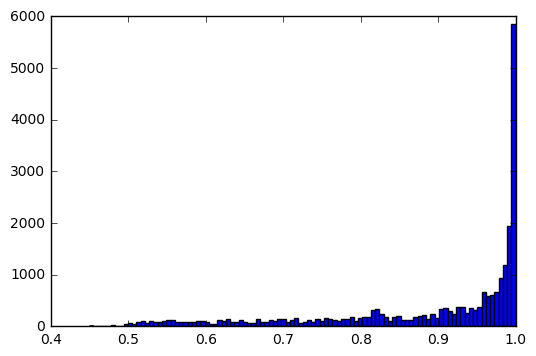

In [17]:
print g2.mean(axis=1)/2
plt.hist(g2.mean(axis=1)/2,100);

0.8212890625


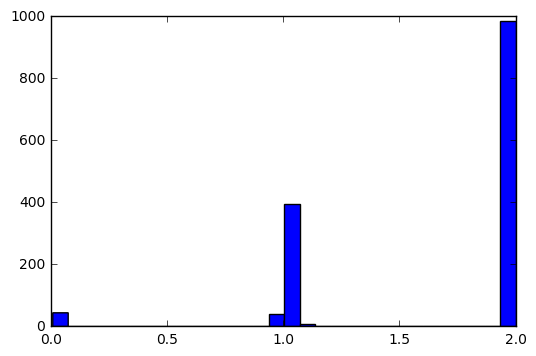

In [19]:
print g2[13,:].mean()/2
plt.hist(g2[13,:],30);

# Polygenic Score

In [20]:
df_height_gwas=pd.read_csv('{}/height_GWAS_Wood_2018.txt'.format(SummerSchool_PATH),sep=' ')
print df_height_gwas.shape
df_height_gwas.head()

(3290, 10)


,SNP,CHR,POS,Tested_Allele,Other_Allele,Freq_Tested_Allele_in_HRS,BETA,SE,P,N
0,rs10003497,4,88429759,A,G,0.63800,-0.0016,0.0016,3.400000e-01,551351
1,rs1000410,20,39634366,C,G,0.56250,-0.0009,0.0015,5.500000e-01,704651
2,rs10008015,4,106005247,T,C,0.89140,0.0270,0.0024,1.400000e-29,684963
3,rs10010325,4,106106353,A,C,0.49260,0.0289,0.0014,6.800000e-89,705291
4,rs10016290,4,13525398,T,G,0.90225,0.0083,0.0024,4.500000e-04,696520


In [21]:
df_height_gwas['MarkerName']=df_height_gwas.apply(lambda x : "{}:{}".format(x.CHR,x.POS), axis=1)

In [22]:
df_height_gwas.head()

,SNP,CHR,POS,Tested_Allele,Other_Allele,Freq_Tested_Allele_in_HRS,BETA,SE,P,N,MarkerName
0,rs10003497,4,88429759,A,G,0.63800,-0.0016,0.0016,3.400000e-01,551351,4:88429759
1,rs1000410,20,39634366,C,G,0.56250,-0.0009,0.0015,5.500000e-01,704651,20:39634366
2,rs10008015,4,106005247,T,C,0.89140,0.0270,0.0024,1.400000e-29,684963,4:106005247
3,rs10010325,4,106106353,A,C,0.49260,0.0289,0.0014,6.800000e-89,705291,4:106106353
4,rs10016290,4,13525398,T,G,0.90225,0.0083,0.0024,4.500000e-04,696520,4:13525398


In [23]:
store=pd.HDFStore( '{}/{}/{}/probes/{}.h5'.format(SummerSchool_PATH,study_2,study_2,study_2),'r' )
df_lead_snps_info=store.select('probes',where='ID=={}'.format(df_height_gwas.MarkerName.tolist()))
store.close()

In [25]:
print df_lead_snps_info.shape
df_lead_snps_info.tail()

(12, 7)


,ID,allele1,allele2,MAF,Rsq,CHR,bp
24619,7:38029785,9088027334,10752032341,0.15876,1.00024,7,38029785
25059,7:38110073,10752032341,8320025024,0.33225,0.99981,7,38110073
43600,7:42096266,10752032341,8576025794,0.48073,0.98599,7,42096266
44096,7:42188538,8576025794,8320025024,0.19634,0.99986,7,42188538
48842,7:43114515,8576025794,10752032341,0.27099,0.98086,7,43114515


In [26]:
df_lead_snps_info['A1']=get_alleles( df_lead_snps_info.allele1 ,df_hash_2  ) 
df_lead_snps_info['A2']=get_alleles( df_lead_snps_info.allele2 ,df_hash_2  )

In [27]:
df_lead_snps_info.head()

,ID,allele1,allele2,MAF,Rsq,CHR,bp,A1,A2
1067,7:33395764,9088027334,8576025794,0.08172,0.57776,7,33395764,G,C
2396,7:33666421,9088027334,8320025024,0.23935,0.99354,7,33666421,G,C
3238,7:33830300,8320025024,9088027334,0.23070,0.98499,7,33830300,G,C
14270,7:36081175,8320025024,8576025794,0.22028,0.97942,7,36081175,A,C
21172,7:37395373,10752032341,8576025794,0.28967,0.93596,7,37395373,A,C


In [35]:
df_snps=get_snps(df_height_gwas.MarkerName.tolist(), study_path='{}/{}/{}/'.format(SummerSchool_PATH,study_2,study_2), study_name='study_2')

In [36]:
df_snps.head()

,7:33395764,7:33666421,7:33830300,7:36081175,7:37395373,7:37972827,7:37977116,7:38029785,7:38110073,7:42096266,7:42188538,7:43114515,id
0,1.700195,1.0,2.000000,2.000000,1.373047,1.0,1.996094,2.0,2.0,1.000000,1.0,0.267090,study_2_0
1,1.931641,2.0,1.001953,1.009766,1.000000,2.0,1.006836,2.0,1.0,0.000000,1.0,1.000000,study_2_1
2,2.000000,2.0,2.000000,1.999023,1.000000,1.0,1.992188,2.0,2.0,1.000000,2.0,0.998047,study_2_2
3,1.889648,1.0,1.000977,2.000000,0.999023,1.0,1.992188,2.0,1.0,1.999023,1.0,1.000000,study_2_3
4,1.821289,2.0,2.000000,1.000977,2.000000,2.0,1.993164,2.0,1.0,0.999023,2.0,2.000000,study_2_4


In [37]:
(df_snps.mean(axis=0)/2)

7:33395764    0.918289
7:33666421    0.760681
7:33830300    0.769301
7:36081175    0.779722
7:37395373    0.710343
7:37972827    0.619726
7:37977116    0.850202
7:38029785    0.841242
7:38110073    0.667755
7:42096266    0.519272
7:42188538    0.803658
7:43114515    0.729030
dtype: float64

In [38]:
PGS_SNPs=df_snps.columns[df_snps.columns!='id']

PGS=np.dot( df_height_gwas[df_height_gwas.MarkerName.isin(PGS_SNPs)].BETA ,  df_snps[PGS_SNPs].T  )

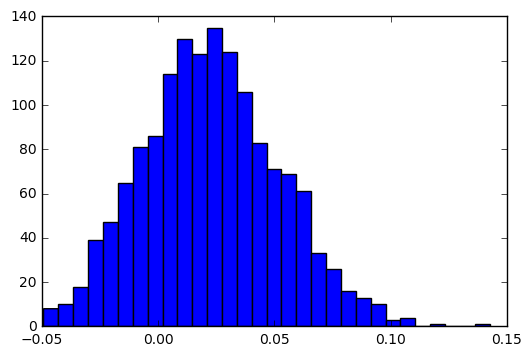

In [39]:
plt.hist(PGS,bins=30);